Remarques:
- La condition sur les agents devrait etre que presision*size agent soit un integer, sauf que les agents de masse = 1 sont de aussi acceptables malgres que 0.5*1 = 0.5 (float)
- question : comment peut-t-on afficher l'allure de la vitesse de la vitesse souhaité
- Je ne peux pas à creer la sortie n'importe Ou , exits = [Exit((220,99),10,2)], ou peut etre le couple ( exit, obstacles ) n'est pas acceptable

In [2]:
from Obstacle import Obstacle
from Exit import Exit
from GridGraph import GridGraph
from FastMarching import fast_marching_method
from Agent import Agent
from datetime import datetime
import numpy as numpy
import random as rd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib import animation
from pylab import show,imshow

import os
from os import startfile

In [3]:
def example_simulation(obstacles,agents,exits,name, time_simulation,size_scene):
    
    dt = .2 # time steps in seconds, 400 time steps on total
    launch_simulation(obstacles,exits,agents,time_simulation,dt,name,size_scene,)

In [8]:
def launch_simulation(obstacles,exits,agents,time_simulation,dt,name,size_scene):
    
    history_agents = []
    
    print ("Initialization of the agents...")
    # nodes per unity
    Start_time = datetime
    precision = 0.5
    navigation_maps = {}
    
    for agent in agents:
        if agent.size not in navigation_maps:
            debug_precision = precision
            #to make sure that precision*agent.size is an integer
            if not precision*agent.size == int(precision*agent.size):
                debug_precision = 1
            graph = GridGraph(size_scene,debug_precision)
            graph.prepare_graph_for_fast_marching(obstacles,exits,agent)
            fast_marching_method(graph, graph.to_node(agent.position))
            navigation_maps[agent.size] = graph
            #shows the distance map to the exit after applying the fast marching method
            imshow(graph.distances,interpolation='nearest',origin='lower')
            show()
    for agent in agents:
        agent.navigation_map = navigation_maps[agent.size]
        
    
    loading_bar = 0
    print ("Simulation running...")
    
    #start simulation
    for t in range(int(time_simulation/dt)):
        
        #loading bar
        if int(t/float(int(time_simulation/dt))*100)==loading_bar:
            print ("#",)
            loading_bar = loading_bar+10
        
        #initialize patches for the agents for one frame of the animation
        patches_agents = []
        
        numpy.random.seed(1)
        pick_agent = numpy.random.choice(len(agents),len(agents),replace=False)
        for i in pick_agent:
            #update the speed of the agent
            agents[i].update_speed(agents,obstacles)
            #update the position of the agent
            agents[i].update_position(agents,obstacles,exits,dt,size_scene)
            #add patch of the agent for one frame
            patches_agents.append(patches.Circle(agents[i].position,agents[i].size,color=[agents[i].get_color_agent(),0,0]))
             
        
        history_agents.append(patches_agents)
        
        agents = [v for i, v in enumerate(agents) if not v.has_reached_exit]
        #print(update_time_move_agents(time_move,agents,dt))
        
        if len(agents) == 0:
            break;
        if t%50==0:
            print(len(agents))
    print ('')
    print ('Simulation finished at time '+str((t+1)*dt)+'s')
    
    display_simulation(history_agents, obstacles, exits, size_scene,dt,3,name)

In [9]:
def display_simulation(history_agents,obstacles, exits, size_scene,dt,speed,name):
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim([0,size_scene[0]])
    ax.set_ylim([0,size_scene[1]])

    for obstacle in obstacles:
        ax.add_patch(patches.Rectangle((obstacle.position[0],obstacle.position[1]),obstacle.width,obstacle.height))

    for exit_ in exits:
        ax.add_patch(patches.Rectangle((exit_.position[0],exit_.position[1]),exit_.width,exit_.height,color='black'))
    
    def init():
        for i in range(len(history_agents)):
            for j in range(len(history_agents[i])):
                history_agents[i][j].set_visible(False)
        return []

    def animate(i):
        patches = []
        if i>0:
            for j in range(len(history_agents[i-1])):
                history_agents[i-1][j].set_visible(False)
        for j in range(len(history_agents[i])):
            history_agents[i][j].set_visible(True)
            patches.append(ax.add_patch(history_agents[i][j]))
        return patches
    
    
    #interval doesn't work
    anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(history_agents), interval=dt*1000/float(speed))
    
    def save_simulation(namee):
        print ("Saving the simulation...")
        
        # Set up formatting for the movie files
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=1/float(dt)*speed, metadata=dict(artist='Me'), bitrate=1800)
        filename = os.path.abspath('')+f"\Videos\{namee}.mp4"
        anim.save(filename, writer)
        startfile(filename)
    
    save_simulation(name)
    
    print ('Simulation saved under the name:',name)


In [10]:
def Square_agents(leader_coordinates,Nb_columns,Nb_lines,distancing): # the distancing is the distances between two Agents,must be greater than 2*size 
    List_agents = []
    for i in range(Nb_lines):
        for j in range(Nb_columns):
            Mass = rd.choices([1,2], weights=[1,3], cum_weights=None, k=1)[0]
            List_agents.append(Agent((leader_coordinates[0]+i*distancing, leader_coordinates[1]+j*distancing),Mass))
    return List_agents

print(Square_agents((10,10),2,2,5))

[Agent
Position :(10, 10)
Speed :(0, 0), Agent
Position :(10, 15)
Speed :(0, 0), Agent
Position :(15, 10)
Speed :(0, 0), Agent
Position :(15, 15)
Speed :(0, 0)]


Braes Paradox :

1st Example of the simulation :

-------------------------------
2nd Example of the simulation :


Initialization of the agents...


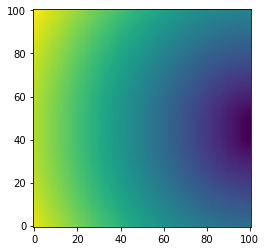

Simulation running...
#
32
#
32
#
18

Simulation finished at time 30.0s


In [23]:
exits = [Exit((99,40),2,10)]

obstacles = []

agents = Square_agents((10,10),4,4,6)+ Square_agents((10,50),4,2,6)+ Square_agents((40,50),4,2,6) # population

example_simulation(obstacles,agents,exits,'Chauvechement en arc',time_simulation = 100, size_scene =(100,100))

Initialization of the agents...


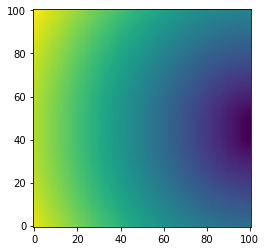

Simulation running...
#
18
#
18
#
#
14
#

Simulation finished at time 29.0s


In [24]:
exits = [Exit((99,40),2,10)]

obstacles = []


agents = Square_agents((0,10),3,2,6)+ Square_agents((0,50),4,3,10) # population

example_simulation(obstacles,agents,exits,'Braes_without_obstacles',time_simulation = 60, size_scene =(100,100))

In [2]:
exits = [Exit((99,40),2,10)]

obstacles = [Obstacle((55,35),20,20)]

agents = Square_agents((0,10),3,2,6)+ Square_agents((0,50),4,3,10) # population

example_simulation(obstacles,agents,exits,'Braes_with_obstacles',time_simulation = 60, size_scene =(100,100))

NameError: name 'Exit' is not defined

Initialization of the agents...


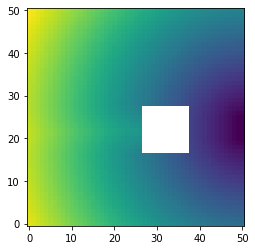

Simulation running...
#
#
#
#
#
#
#
#
#
#

Simulation finished at time 60.0s
Saving the simulation...
Simulation saved under the name: Braes_with_obstacles


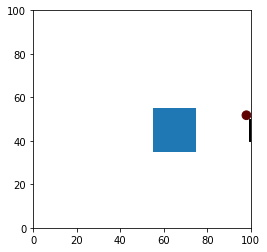

In [11]:
exits = [Exit((99,40),2,10)]

obstacles = [Obstacle((55,35),20,20)]

agents = Square_agents((20,10),2,2,5)+Square_agents((0,10),3,2,6)+ Square_agents((0,50),4,3,10) # population

example_simulation(obstacles,agents,exits,'Braes_with_obstacles',time_simulation = 60, size_scene =(100,100))

Initialization of the agents...


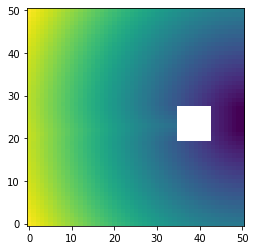

Simulation running...
#
#
#
#
#
#

Simulation finished at time 35.300000000000004s
Saving the simulation...
Simulation saved under the name: Braes_with_obstacles_2


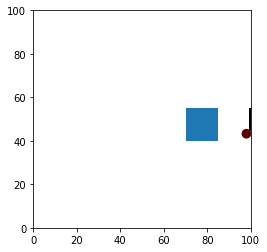

In [14]:
exits = [Exit((99,45),2,10)]

obstacles = [Obstacle((70,40),15,15)]

agents = Square_agents((20,10),2,2,7)+Square_agents((0,10),3,2,6)+ Square_agents((0,50),4,3,10) # population

example_simulation(obstacles,agents,exits,'Braes_with_obstacles_2',time_simulation = 60, size_scene =(100,100))

Initialization of the agents...


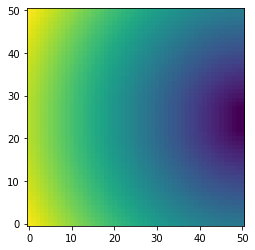

Simulation running...
#
#
#
#
#
#

Simulation finished at time 35.7s
Saving the simulation...
Simulation saved under the name: Braes_without_obstacles_2


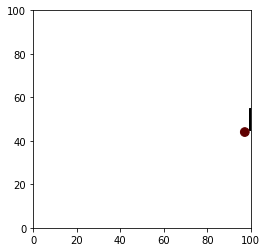

In [15]:
exits = [Exit((99,45),2,10)]

obstacles = []

agents = Square_agents((20,10),2,2,7)+Square_agents((0,10),3,2,6)+ Square_agents((0,50),4,3,10) # population

example_simulation(obstacles,agents,exits,'Braes_without_obstacles_2',time_simulation = 60, size_scene =(100,100))

Initialization of the agents...


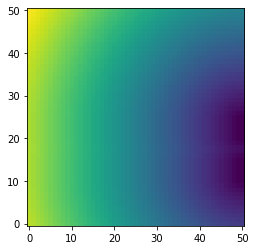

Simulation running...
#
#
#
#
#
#
#
#
#
#

Simulation finished at time 60.0s
Saving the simulation...
Simulation saved under the name: Braes with double exit


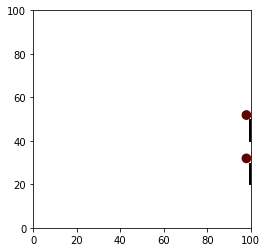

In [31]:

#double Exit Braes : 

exits = [Exit((99,20),2,10), Exit((99,40),2,10)]

obstacles = []

agents = Square_agents((10,20),10,4,6) # population

example_simulation(obstacles,agents,exits,'Braes with double exit',time_simulation = 60, size_scene =(100,100))

Initialization of the agents...


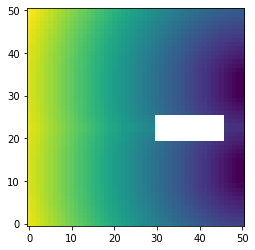

Simulation running...
#
#
#
#
#
#
#
#
#
#

Simulation finished at time 60.0s
Saving the simulation...
Simulation saved under the name: Double exit


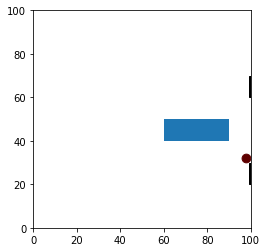

In [28]:
#double Exit Braes : 

exits = [Exit((99,20),2,10), Exit((99,60),2,10)]

obstacles = [Obstacle((60,40),30,10)]

agents = Square_agents((10,20),10,4,6) # population

example_simulation(obstacles,agents,exits,'Braes with double exit_WO',time_simulation = 60, size_scene =(100,100))

In [1]:
#double Exit Braes : 

exits = [Exit((149,45),2,10)]

obstacles = []

agents = Square_agents((10,20),12,8,6) # population

example_simulation(obstacles,agents,exits,'Braesprime',time_simulation = 50, size_scene =(150,100))

NameError: name 'Exit' is not defined

Initialization of the agents...


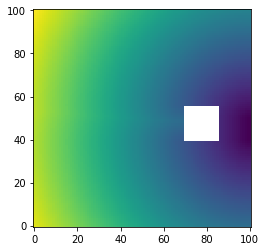

Simulation running...
#
#
#
#

Simulation finished at time 38.2s
Saving the simulation...
Simulation saved under the name: Braesprime1


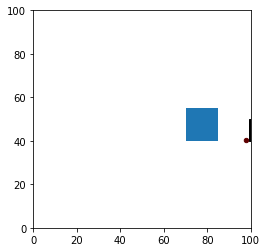

In [11]:
exits = [Exit((99,40),2,10)]

obstacles = [Obstacle((70,40),15,15)]

agents = Square_agents((10,20),10,7,4) # population

example_simulation(obstacles,agents,exits,'Braesprime1',time_simulation = 100, size_scene =(100,100))

Initialization of the agents...


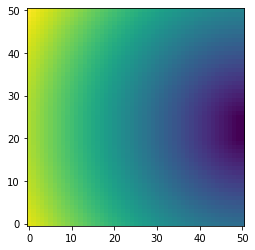

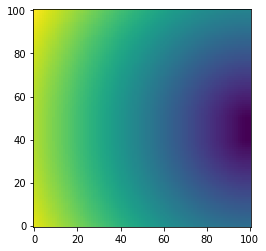

Simulation running...
#
70
#
57
#
22
#
2

Simulation finished at time 32.6s
Saving the simulation...
Simulation saved under the name: Genetic_algorithm_simulation


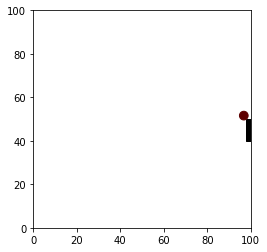

In [14]:
obstacles =[]
exits = [Exit((98,40),2,10)]
agents = Square_agents((20,20),10,7,6) # population
 # population
 # population

example_simulation(obstacles,agents,exits,'Genetic_algorithm_simulation',time_simulation = 100, size_scene =(100,100))